In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set_context("notebook")
import matplotlib.pyplot as plt

In [3]:
team_data = pd.read_csv('project_dataset.csv', na_values = '--')
team_data['T'].fillna(0, inplace=True)
team_data['OT'].fillna(0, inplace=True)
team_data['Cup'] = np.zeros(len(team_data))
team_data.iloc[684,24] = 1
team_data.iloc[174,24] = 1
team_data.iloc[614,24] = 1
team_data.iloc[609,24] = 1
team_data.iloc[593,24] = 1
team_data.iloc[687,24] = 1
team_data.iloc[550,24] = 1
team_data.iloc[545,24] = 1
team_data.iloc[153,24] = 1
team_data.iloc[311,24] = 1
team_data.iloc[163,24] = 1
team_data.iloc[328,24] = 1
team_data.iloc[56,24] = 1
team_data.iloc[150,24] = 1
team_data.iloc[552,24] = 1
team_data.iloc[255,24] = 1
team_data.iloc[3,24] = 1
team_data.iloc[125,24] = 1
team_data.iloc[628,24] = 1
team_data.iloc[411,24] = 1
team_data.iloc[244,24] = 1
team_data.iloc[179,24] = 1
team_data.iloc[404,24] = 1
team_data.iloc[227,24] = 1


In [4]:
team_data = team_data[team_data['GP']==82]

In [5]:
team_data.shape

(629, 25)

In [6]:
sc_model = sm.OLS(team_data['Cup'], sm.add_constant(team_data.iloc[:,4:24]))
results = sc_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Cup   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.574
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000518
Time:                        16:57:06   Log-Likelihood:                 209.10
No. Observations:                 629   AIC:                            -382.2
Df Residuals:                     611   BIC:                            -302.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.001     -1.589      0.1

In [11]:
my_list = [13,14] + list(range(19,24))
point_model = sm.OLS(team_data['P'], sm.add_constant(team_data.iloc[:,my_list]))
results = point_model.fit()
print(results.summary())

# Directly avoiding all variables which may be directly correlated with wins, such as Losses, points, regulation wins, and S/O wins
# Removed Goals for and goals against as those are already accounted for in GF/GP and GA/GP

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     892.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.45e-319
Time:                        16:58:44   Log-Likelihood:                -1856.0
No. Observations:                 629   AIC:                             3728.
Df Residuals:                     621   BIC:                             3764.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.0381      9.734      9.866      0.0

In [15]:
team_data.iloc[:,10:]

,RW,ROW,S/O Win,GF,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%,Cup
1,31,34,5,233,243,2.84,2.96,21.0,79.3,18.0,81.8,30.1,33.4,48.1,0.0
2,40,43,3,220,197,2.68,2.40,18.7,84.7,15.9,87.9,29.6,29.6,54.7,0.0
3,39,44,4,254,198,3.10,2.41,22.4,85.1,21.4,86.1,31.5,27.4,51.9,1.0
4,35,39,8,197,184,2.40,2.24,16.6,83.1,14.7,85.1,27.3,28.0,50.2,0.0
6,35,43,8,228,221,2.78,2.70,15.7,81.0,13.2,84.3,30.0,28.9,51.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,27,33,4,221,242,2.70,2.95,17.9,80.1,14.7,81.2,30.1,30.1,49.0,0.0
719,29,32,3,212,236,2.59,2.88,14.8,78.4,13.2,81.9,29.6,29.5,46.7,0.0
720,24,29,8,219,231,2.67,2.82,15.4,83.2,13.1,84.9,30.7,30.1,46.9,0.0
721,32,37,2,250,253,3.05,3.09,21.1,75.0,17.8,78.9,32.3,33.2,50.7,0.0


In [16]:
reduced_point_model = sm.OLS(team_data['P'], sm.add_constant(team_data.iloc[:,[13,14,20,21,23]]))
results = reduced_point_model.fit()
print(results.summary())
# Reduce model to variables from previous model which have P > |t| of less than .05

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1196.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.61e-316
Time:                        17:02:30   Log-Likelihood:                -1869.4
No. Observations:                 629   AIC:                             3751.
Df Residuals:                     623   BIC:                             3778.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.0128      9.348     12.090      0.0

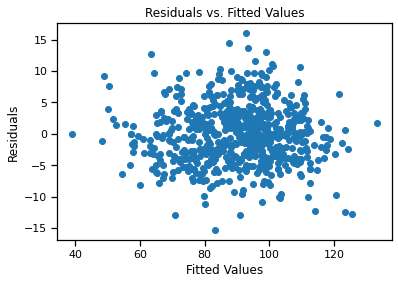

In [17]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()